In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.activations import relu,linear,softmax
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [2]:
schema_data = pd.read_csv('../../Datasets/Tamil Char Recognition/schema.csv',dtype=object)

In [3]:
schema_data

,letter,folder,class
0,அ,001,0
1,ஆ,002,1
2,இ,003,2
3,ஈ,004,3
4,உ,005,4
5,ஊ,006,5
6,எ,007,6
7,ஏ,008,7
8,ஐ,009,8
9,ஒ,010,9


In [4]:
dataset_base_path = "../../Datasets/Tamil Char Recognition/data"
all_folders = os.listdir(dataset_base_path)

In [5]:
train_set = []
test_set = []
validation_set = []

In [6]:
for folder in all_folders:
    pixel_data = []
    for image in os.listdir(dataset_base_path+'/'+folder):
        resized_image = Image.open(dataset_base_path+'/'+folder+'/'+image).resize((28,28))
        resized_image = resized_image.convert("L")
        pixel_values = np.array(resized_image)
        pixel_values = pixel_values.reshape(1,784)
        pixel_values = pixel_values / 255.0
        pixel_values = np.append(pixel_values,np.float64(schema_data[schema_data['folder'] == folder]['class'])).reshape(1,785)
        pixel_data.append(pixel_values)
    result = np.vstack(pixel_data)
    temp_train,temp_=train_test_split(result,test_size=0.40, random_state=1)
    temp_test,temp_valid = train_test_split(temp_,test_size=0.50, random_state=1)   
    train_set.append(temp_train)
    test_set.append(temp_test)
    validation_set.append(temp_valid)

C:\Users\Kesavan Ramalingam\AppData\Local\Temp\ipykernel_25456\3060580998.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pixel_values = np.append(pixel_values,np.float64(schema_data[schema_data['folder'] == folder]['class'])).reshape(1,785)


In [7]:
train_set = np.vstack(train_set)
test_set = np.vstack(test_set)
validation_set = np.vstack(validation_set)

In [8]:
print(train_set.shape)
print(test_set.shape)
print(validation_set.shape)

(4095, 785)
(1365, 785)
(1365, 785)


In [9]:
x_train = train_set[:,:-1]
y_train = train_set[:,-1]
x_test = test_set[:,:-1]
y_test = test_set[:,-1]
x_valid = validation_set[:,:-1]
y_valid = validation_set[:,-1]

In [10]:
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)
y_valid = y_valid.astype(np.int64)

In [11]:
y_train.shape

(4095,)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_valid.shape)
print(y_valid.shape)

(4095, 784)
(4095,)
(1365, 784)
(1365,)
(1365, 784)
(1365,)


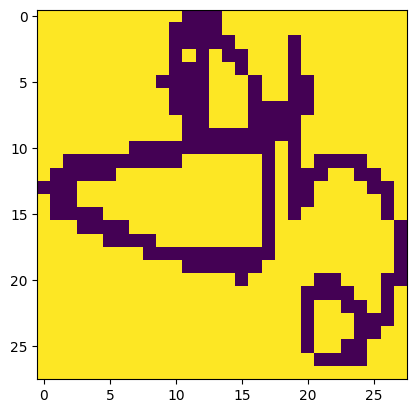

In [13]:
plt.imshow(np.array(x_train[500]).reshape(28,28))

In [14]:
nn_models = [
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=120,activation='relu'),
        Dense(units=60,activation='relu'),
        Dense(units=30,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-1'),
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=150,activation='relu'),
        Dense(units=90,activation='relu'),
        Dense(units=60,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-2'),
          
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=180,activation='relu'),
        Dense(units=120,activation='relu'),
        Dense(units=90,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-3'), 

    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=210,activation='relu'),
        Dense(units=150,activation='relu'),
        Dense(units=120,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-4'), 
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=240,activation='relu'),
        Dense(units=180,activation='relu'),
        Dense(units=150,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-5'), 
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=270,activation='relu'),
        Dense(units=240,activation='relu'),
        Dense(units=180,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-6'),  
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=300,activation='relu'),
        Dense(units=270,activation='relu'),
        Dense(units=210,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-7'),  
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=330,activation='relu'),
        Dense(units=300,activation='relu'),
        Dense(units=240,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-8'), 
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=360,activation='relu'),
        Dense(units=330,activation='relu'),
        Dense(units=270,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-8'),  
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=390,activation='relu'),
        Dense(units=360,activation='relu'),
        Dense(units=300,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-9'),  
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=410,activation='relu'),
        Dense(units=390,activation='relu'),
        Dense(units=330,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-10'),
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=120,activation='relu'),
        Dense(units=60,activation='relu'),
        Dense(units=30,activation='relu'),
        Dense(units=15,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-11'), 
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=150,activation='relu'),
        Dense(units=90,activation='relu'),
        Dense(units=60,activation='relu'),
        Dense(units=30,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-12'),   

    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=180,activation='relu'),
        Dense(units=120,activation='relu'),
        Dense(units=90,activation='relu'),
        Dense(units=60,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-13'),  
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=210,activation='relu'),
        Dense(units=150,activation='relu'),
        Dense(units=120,activation='relu'),
        Dense(units=90,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-14'),
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=240,activation='relu'),
        Dense(units=180,activation='relu'),
        Dense(units=150,activation='relu'),
        Dense(units=120,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-15'), 
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=270,activation='relu'),
        Dense(units=210,activation='relu'),
        Dense(units=180,activation='relu'),
        Dense(units=150,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-16'),  
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=300,activation='relu'),
        Dense(units=240,activation='relu'),
        Dense(units=210,activation='relu'),
        Dense(units=180,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-17'),     
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=330,activation='relu'),
        Dense(units=270,activation='relu'),
        Dense(units=240,activation='relu'),
        Dense(units=210,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-18'),
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=360,activation='relu'),
        Dense(units=300,activation='relu'),
        Dense(units=270,activation='relu'),
        Dense(units=240,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-19'), 
    
    
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=390,activation='relu'),
        Dense(units=330,activation='relu'),
        Dense(units=300,activation='relu'),
        Dense(units=270,activation='relu'),
        Dense(units=13,activation='softmax'),
    ],name='model-20'),                                                      
                     
]

In [15]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

In [16]:
for i in range(len(nn_models)):    
    nn_models[i].compile(
        loss = tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics ='accuracy' 
    )    
    # nn_models[i].compile(loss ='sparse_categorical_crossentropy',optimizer='adam',metrics ='accuracy')        
    nn_models[i].fit(x_train,y_train,epochs=25,callbacks=[tb_callback])

Epoch 1/25
128/128 [==============================] - 2s 5ms/step - loss: 1.7449 - accuracy: 0.4398
Epoch 2/25
128/128 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.7875
Epoch 3/25
128/128 [==============================] - 0s 3ms/step - loss: 0.4871 - accuracy: 0.8444
Epoch 4/25
128/128 [==============================] - 0s 3ms/step - loss: 0.3940 - accuracy: 0.8686
Epoch 5/25
128/128 [==============================] - 0s 4ms/step - loss: 0.3448 - accuracy: 0.8877
Epoch 6/25
128/128 [==============================] - 0s 4ms/step - loss: 0.2755 - accuracy: 0.9111
Epoch 7/25
128/128 [==============================] - 1s 4ms/step - loss: 0.2736 - accuracy: 0.9031
Epoch 8/25
128/128 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 0.9297
Epoch 9/25
128/128 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 0.9350
Epoch 10/25
128/128 [==============================] - 0s 3ms/step - loss: 0.1697 - accuracy: 0.9492

In [17]:
train_error = np.zeros(len(nn_models))
cv_error = np.zeros(len(nn_models))

In [18]:
for i in range(len(nn_models)):
    y_hat = []
    # predictions = tf.nn.softmax(nn_models[i].predict(x_train))
    predictions = nn_models[i].predict(x_train)
    for j in range(predictions.shape[0]):
        y_hat.append(np.argmax(predictions[j]))
    train_error[i] = np.mean(y_hat!=y_train)

128/128 [==============================] - 0s 3ms/step


In [19]:
for i in range(len(nn_models)):
    y_hat = []
    # predictions = tf.nn.softmax(nn_models[i].predict(x_valid))
    predictions = nn_models[i].predict(x_valid)
    for j in range(predictions.shape[0]):
        y_hat.append(np.argmax(predictions[j]))
    cv_error[i] = np.mean(y_hat!=y_valid)

43/43 [==============================] - 0s 2ms/step


In [20]:
print("Training Error" ,str(train_error))
print("Cross Validation Error" ,str(cv_error))

Training Error [0.0029304  0.0031746  0.01782662 0.0029304  0.0026862  0.0041514
 0.003663   0.01953602 0.01782662 0.00512821 0.01562882 0.01098901
 0.0039072  0.01123321 0.0034188  0.0019536  0.01196581 0.0026862
 0.01172161 0.0046398  0.01489621]
Cross Validation Error [0.0981685  0.08864469 0.0996337  0.07838828 0.07106227 0.07619048
 0.08717949 0.08864469 0.09010989 0.07252747 0.08278388 0.09304029
 0.07399267 0.08351648 0.07985348 0.06813187 0.07619048 0.07179487
 0.08424908 0.06666667 0.09304029]


In [28]:
print(train_error[19])
print(cv_error[19])

0.00463980463980464
0.06666666666666667


In [27]:
y_hat = []
# predictions = tf.nn.softmax(nn_models[i].predict(x_valid))
predictions = nn_models[19].predict(x_test)
for j in range(predictions.shape[0]):
    y_hat.append(np.argmax(predictions[j]))
test_error = np.mean(y_hat!=y_test)
test_error

43/43 [==============================] - 0s 3ms/step


0.10329670329670329

In [ ]:
plt.xlabel("Model Complexity")
plt.ylabel("Error")
plt.title("Neural Network Complexity vs Error")

plt.plot(np.array([1,2,3,4,5,6]),train_error,marker='o')
plt.plot(np.array([1,2,3,4,5,6]),cv_error,marker='o')

plt.legend(['Train Error','Cross Validation Error'])

In [ ]:
lambdas = [0.01, 0.02, 0.05, 0.07, 0.1, 0.2]

r_train_error = np.zeros(len(lambdas))
r_cv_error = np.zeros(len(lambdas))

r_nn_model = [              
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=400,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[0])),
        Dense(units=240,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[0])),
        Dense(units=120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[0])),
        Dense(units=13,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(lambdas[0])),
    ],name='r_nn_model-1'),  
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=400,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[1])),
        Dense(units=240,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[1])),
        Dense(units=120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[1])),
        Dense(units=13,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(lambdas[1])),
    ],name='r_nn_model-2'),  
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=400,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[2])),
        Dense(units=240,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[2])),
        Dense(units=120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[2])),
        Dense(units=13,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(lambdas[2])),
    ],name='r_nn_model-3'),  
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=400,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[3])),
        Dense(units=240,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[3])),
        Dense(units=120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[3])),
        Dense(units=13,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(lambdas[3])),
    ],name='r_nn_model-4'),  
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=400,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[4])),
        Dense(units=240,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[4])),
        Dense(units=120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[4])),
        Dense(units=13,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(lambdas[4])),
    ],name='r_nn_model-5'),  
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=400,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[5])),
        Dense(units=240,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[5])),
        Dense(units=120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[5])),
        Dense(units=13,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(lambdas[5])),
    ],name='r_nn_model-6')                                 
]

In [ ]:
lambdas = [0.01, 0.02, 0.05, 0.07, 0.1, 0.2]

r_train_error = np.zeros(len(lambdas))
r_cv_error = np.zeros(len(lambdas))

r_nn_model = [              
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=400,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[0])),
        Dense(units=240,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[0])),
        Dense(units=120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[0])),
        Dense(units=13,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(lambdas[0])),
    ],name='r_nn_model-1'),  
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=400,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[1])),
        Dense(units=240,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[1])),
        Dense(units=120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[1])),
        Dense(units=13,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(lambdas[1])),
    ],name='r_nn_model-2'),  
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=400,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[2])),
        Dense(units=240,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[2])),
        Dense(units=120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[2])),
        Dense(units=13,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(lambdas[2])),
    ],name='r_nn_model-3'),  
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=400,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[3])),
        Dense(units=240,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[3])),
        Dense(units=120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[3])),
        Dense(units=13,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(lambdas[3])),
    ],name='r_nn_model-4'),  
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=400,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[4])),
        Dense(units=240,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[4])),
        Dense(units=120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[4])),
        Dense(units=13,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(lambdas[4])),
    ],name='r_nn_model-5'),  
    Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(units=400,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[5])),
        Dense(units=240,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[5])),
        Dense(units=120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambdas[5])),
        Dense(units=13,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(lambdas[5])),
    ],name='r_nn_model-6')                                 
]

In [ ]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/reg_v1",histogram_freq=1)

In [ ]:
for i in range(len(r_nn_model)):
    
    r_nn_model[i].compile(
        loss = tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    )
    
    r_nn_model[i].fit(x_train,y_train,epochs=30,callbacks=[tb_callback])

In [ ]:
r_train_error = np.zeros(len(nn_models))
r_cv_error = np.zeros(len(nn_models))

In [ ]:
for i in range(len(r_nn_model)):
    y_hat = []
    # predictions = tf.nn.softmax(nn_models[i].predict(x_train))
    predictions = r_nn_model[i].predict(x_train)
    for j in range(predictions.shape[0]):
        y_hat.append(np.argmax(predictions[j]))
    r_train_error[i] = np.mean(y_hat!=y_train)

In [ ]:
for i in range(len(r_nn_model)):
    y_hat = []
    # predictions = tf.nn.softmax(nn_models[i].predict(x_valid))
    predictions = r_nn_model[i].predict(x_valid)
    for j in range(predictions.shape[0]):
        y_hat.append(np.argmax(predictions[j]))
    r_cv_error[i] = np.mean(y_hat!=y_valid)

In [ ]:
print("Training Error" ,str(r_train_error))
print("Cross Validation Error" ,str(r_cv_error))

In [ ]:
np.min(r_cv_error)

In [ ]:
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.title("Regularization vs Error")

plt.plot(lambdas,r_train_error,marker='o')
plt.plot(lambdas,r_cv_error,marker='o')

plt.legend(['R Train Error','R Cross Validation Error'])

In [ ]:
y_hat = []
# predictions = tf.nn.softmax(nn_models[i].predict(x_valid))
predictions = r_nn_model[0].predict(x_test)
for j in range(predictions.shape[0]):
    y_hat.append(np.argmax(predictions[j]))
test_error = np.mean(y_hat!=y_test)
test_error